In [1]:
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
import json

# Specify the path to your JSON file
file_path = 'FinalDataset.json'

# Open the file and read its content
with open(file_path, 'r') as file:
    data = json.load(file)

# Now, you can use the data as a Python dictionary
# print(data)


In [5]:
values = data.values()
queries = []
for value in values:
    queries.append(value['input'])

In [6]:
values = data.values()
documents = []
for value in values:
    documents.append(list(value['output'].values())[0][0])

In [2]:

# Create an image with a white background
image = Image.new('RGB', (500, 200), 'white')
draw = ImageDraw.Draw(image)

# Define the font and size
# font = ImageFont.truetype("arial.ttf", 24)

# Add text to the image
draw.text((10, 80), "Hello, World!", fill="black")

# Save the image
image.save('text_image.png')

In [7]:
images = []
for idx, query in tqdm(enumerate(queries)):
    image = Image.new('RGB', (500, 200), 'white')
    draw = ImageDraw.Draw(image)

    # Add text to the image
    draw.text((10, 80), query, fill="black")
    images.append(image)

5207it [00:09, 539.44it/s]


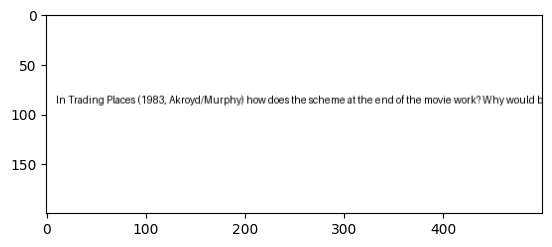

In [8]:
plt.imshow(images[0])
plt.show()

In [10]:
def draw_text_with_wrapping(draw, text, position, font, max_width):
    # Split the text into words
    words = text.split()
    lines = []
    current_line = ""

    for word in words:
        # Check if adding the next word would overflow the max width
        test_line = f"{current_line} {word}".strip()
        # Use textbbox to get the bounding box of the text
        text_bbox = draw.textbbox((position[0], position[1]), test_line, font=font)
        text_width = text_bbox[2] - text_bbox[0]  # Width of the bounding box
        
        if text_width <= max_width:
            current_line = test_line  # Add the word to the current line
        else:
            if current_line:  # Ensure we don't add an empty line
                lines.append(current_line)  # Save the current line and start a new one
            current_line = word  # Start a new line with the current word

    if current_line:  # Add the last line if it's not empty
        lines.append(current_line)

    # Draw the lines of text
    y_offset = position[1]
    for line in lines:
        draw.text((position[0], y_offset), line, fill='black', font=font)
        # Use textbbox to determine the height of the line
        line_bbox = draw.textbbox((position[0], y_offset), line, font=font)
        line_height = line_bbox[3] - line_bbox[1]  # Height of the bounding box
        y_offset += line_height  # Move down for the next line

In [11]:
images = []
for idx, query in tqdm(enumerate(queries)):
    img_width, img_height = 400, 200
    img = Image.new('RGB', (img_width, img_height), color='white')

    # Initialize ImageDraw
    draw = ImageDraw.Draw(img)

    # Specify the font and size (you can use a .ttf font file)
    try:
        font_size = 24
        font = ImageFont.truetype("arial.ttf", font_size)  # Replace with your font path
    except IOError:
        font = ImageFont.load_default()  # Use default font if specified font is not found

    # Define the text and its desired position
    text = queries[idx]
    text_position = (10, 10)  # Starting X, Y coordinates

    # Draw the text with wrapping
    draw_text_with_wrapping(draw, text, text_position, font, img_width - 20)  # 20 is for padding
    images.append(img)

5207it [00:38, 133.73it/s]


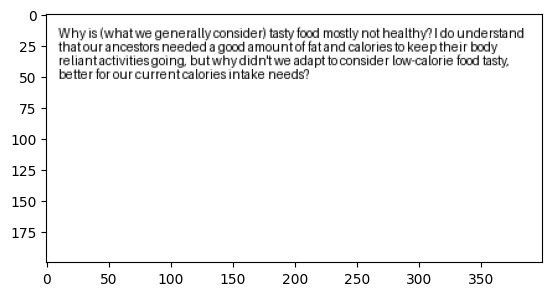

In [12]:
plt.imshow(images[344])
plt.show()